In [218]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset

In [219]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [220]:
df=my_dataset['train'].to_pandas()

In [221]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [222]:
df['job_posted_month_no']=df['job_posted_date'].dt.month

In [223]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [224]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"['r', 'zoom']","{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"['word', 'excel', 'powerpoint', 'outlook']","{'analyst_tools': ['word', 'excel', 'powerpoin...",6
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"['sas', 'sas', 'word', 'excel']","{'analyst_tools': ['sas', 'word', 'excel'], 'p...",8
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"['oracle', 'azure', 'power bi', 'excel', 'word...","{'analyst_tools': ['power bi', 'excel', 'word'...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","['sql', 'vba', 'python', 'excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']...",9
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,['microsoft teams'],{'sync': ['microsoft teams']},10
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1


In [225]:
df_DA_US['job_skills']=df_DA_US['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [226]:
df_DA_US_explode=df_DA_US.explode('job_skills')

In [227]:
df_DA_US_pivot=df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [228]:
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,dart,databricks,...,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,42,10,1,400,363,31,101,35,0,173,77,103,1,7,0,5,0,0,7,1,154,1,111,1,2,0,117,36,3,106,...,1,167,188,0,1,8,6,84,2488,26,32,5,0,0,2,6,0,2,0,8,10,127,0,7,257,191,63,4,1,0,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,28,9,4,314,287,11,55,3,1,111,88,57,0,7,0,5,0,0,4,0,100,0,57,2,0,0,95,32,2,66,...,0,176,164,0,0,13,0,57,1676,12,32,3,0,0,2,4,3,0,0,4,3,50,0,6,164,148,79,2,9,0,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,25,12,4,292,248,19,58,0,0,100,54,66,0,10,0,0,3,0,6,0,119,1,78,3,0,0,78,36,0,47,...,1,108,126,0,0,10,0,75,1804,13,26,4,0,0,2,1,4,0,0,9,3,63,1,9,188,127,78,3,6,0,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,11,11,7,317,233,27,51,10,0,100,52,96,0,12,0,5,0,3,12,0,103,0,60,0,0,1,82,26,0,68,...,0,112,129,0,0,16,0,72,1789,9,34,5,0,0,1,2,0,1,0,12,4,47,0,6,211,133,75,8,4,0,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,19,4,10,210,182,9,36,4,1,105,78,67,0,3,0,0,0,1,10,0,92,0,49,1,0,0,76,23,1,62,...,0,87,86,0,3,4,2,55,1432,8,32,2,0,0,0,2,0,1,6,9,5,23,0,0,134,137,49,3,3,0,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,22,8,5,281,240,29,39,8,0,101,74,52,0,10,0,1,0,0,10,0,97,1,50,8,3,0,77,39,4,85,...,2,131,125,0,1,6,1,57,1628,7,17,3,0,0,2,0,0,5,0,17,3,65,0,4,192,160,45,6,1,0,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,20,12,13,274,228,12,53,9,0,105,37,65,0,10,0,1,0,0,8,0,105,0,52,2,0,0,68,23,1,76,...,1,82,117,0,1,2,2,46,1533,18,23,4,0,1,4,1,0,3,0,3,6,28,1,5,170,132,41,5,1,0,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,28,17,26,349,250,18,65,13,0,170,62,94,0,3,0,2,0,2,0,0,118,0,68,1,1,0,81,34,3,85,...,1,110,148,0,0,7,7,73,1951,26,22,1,0,0,5,3,0,0,2,7,7,54,0,3,237,162,34,5,0,0,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,16,7,17,265,190,14,33,6,0,104,41,60,0,7,0,2,0,0,9,0,77,0,38,3,3,0,59,30,1,61,...,0,70,101,0,3,3,2,35,1353,12,14,5,0,0,0,1,2,2,0,2,8,34,1,2,127,101,41,6,1,1,0,4,80,4,478,0,0,0,1,12


In [229]:
df_DA_US_pivot.loc['Total']=df_DA_US_pivot.sum()

In [230]:
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,dart,databricks,...,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,42,10,1,400,363,31,101,35,0,173,77,103,1,7,0,5,0,0,7,1,154,1,111,1,2,0,117,36,3,106,...,1,167,188,0,1,8,6,84,2488,26,32,5,0,0,2,6,0,2,0,8,10,127,0,7,257,191,63,4,1,0,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,28,9,4,314,287,11,55,3,1,111,88,57,0,7,0,5,0,0,4,0,100,0,57,2,0,0,95,32,2,66,...,0,176,164,0,0,13,0,57,1676,12,32,3,0,0,2,4,3,0,0,4,3,50,0,6,164,148,79,2,9,0,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,25,12,4,292,248,19,58,0,0,100,54,66,0,10,0,0,3,0,6,0,119,1,78,3,0,0,78,36,0,47,...,1,108,126,0,0,10,0,75,1804,13,26,4,0,0,2,1,4,0,0,9,3,63,1,9,188,127,78,3,6,0,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,11,11,7,317,233,27,51,10,0,100,52,96,0,12,0,5,0,3,12,0,103,0,60,0,0,1,82,26,0,68,...,0,112,129,0,0,16,0,72,1789,9,34,5,0,0,1,2,0,1,0,12,4,47,0,6,211,133,75,8,4,0,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,19,4,10,210,182,9,36,4,1,105,78,67,0,3,0,0,0,1,10,0,92,0,49,1,0,0,76,23,1,62,...,0,87,86,0,3,4,2,55,1432,8,32,2,0,0,0,2,0,1,6,9,5,23,0,0,134,137,49,3,3,0,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,22,8,5,281,240,29,39,8,0,101,74,52,0,10,0,1,0,0,10,0,97,1,50,8,3,0,77,39,4,85,...,2,131,125,0,1,6,1,57,1628,7,17,3,0,0,2,0,0,5,0,17,3,65,0,4,192,160,45,6,1,0,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,20,12,13,274,228,12,53,9,0,105,37,65,0,10,0,1,0,0,8,0,105,0,52,2,0,0,68,23,1,76,...,1,82,117,0,1,2,2,46,1533,18,23,4,0,1,4,1,0,3,0,3,6,28,1,5,170,132,41,5,1,0,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,28,17,26,349,250,18,65,13,0,170,62,94,0,3,0,2,0,2,0,0,118,0,68,1,1,0,81,34,3,85,...,1,110,148,0,0,7,7,73,1951,26,22,1,0,0,5,3,0,0,2,7,7,54,0,3,237,162,34,5,0,0,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,16,7,17,265,190,14,33,6,0,104,41,60,0,7,0,2,0,0,9,0,77,0,38,3,3,0,59,30,1,61,...,0,70,101,0,3,3,2,35,1353,12,14,5,0,0,0,1,2,2,0,2,8,34,1,2,127,101,41,6,1,1,0,4,80,4,478,0,0,0,1,12


In [231]:
df_DA_US_pivot=df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [232]:
df_DA_US_pivot=df_DA_US_pivot.drop('Total')

In [233]:
df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,575,514,400,386,443,289,363,306,286,321,349,206,257,236,230,216,243,191,188,189,173,170,167,188,151,154,128,146,106,80,...,2,1,1,0,0,2,1,0,0,0,1,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,405,414,314,278,286,281,287,224,232,182,183,203,164,148,157,150,160,148,164,159,111,105,176,129,79,100,103,113,66,92,...,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,343,304,292,281,271,247,248,248,238,204,206,219,188,143,179,139,156,127,126,119,100,99,108,102,78,119,91,117,47,76,...,0,0,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,361,328,317,313,336,280,233,219,217,206,194,208,211,195,144,155,163,133,129,138,100,138,112,101,104,103,112,98,68,86,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,306,265,210,305,282,200,182,183,170,137,134,144,134,149,163,137,109,137,86,133,105,89,87,109,105,92,89,76,62,67,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,287,297,281,293,278,270,240,194,189,187,166,188,192,135,137,145,118,160,125,119,101,111,131,116,109,97,82,74,85,69,...,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,296,301,274,271,222,223,228,185,145,151,146,160,170,157,150,170,107,132,117,88,105,117,82,84,103,105,85,78,76,59,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,437,338,349,300,293,271,250,262,228,228,228,187,237,183,180,225,126,162,148,124,170,138,110,106,142,118,106,98,85,87,...,1,2,1,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,295,264,265,233,207,221,190,191,180,165,150,145,127,146,152,143,99,101,101,76,104,75,70,66,83,77,90,60,61,80,...,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
DA_totals=df_DA_US.groupby('job_posted_month_no').size()

In [235]:
df_DA_US_percent=df_DA_US_pivot.div((DA_totals)/100, axis=0)

In [236]:
df_DA_US_percent=df_DA_US_percent.reset_index()

In [237]:
df_DA_US_percent['job_posted_month']=df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

In [238]:
df_DA_US_percent=df_DA_US_percent.drop(columns='job_posted_month_no')

In [239]:
df_DA_US_percent=df_DA_US_percent.set_index('job_posted_month')

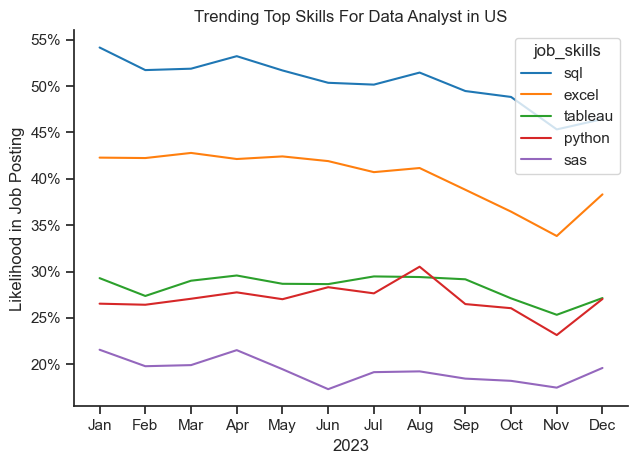

In [252]:
df_DA_US_percent=df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_DA_US_percent, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('Trending Top Skills For Data Analyst in US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
##plt.legend().remove()
plt.tight_layout()
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax=ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
